Trabalhando num novo projeto

In [37]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
data = pd.read_csv(uri)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [38]:
trade = {
    'no': 0,
    'yes' : 1
}

data.sold = data.sold.map(trade)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [39]:
from datetime import datetime

current_year = datetime.today().year
data['model_age'] = current_year - data.model_year
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [40]:
data['km_per_year'] = data.mileage_per_year * 1.60934
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age,km_per_year
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806
3,3,26823,2015,95276.14,0,9,43167.32682
4,4,7935,2014,117384.68,1,10,12770.11290


In [41]:
data = data.drop(columns=["Unnamed: 0", "mileage_per_year", "model_year"], axis=1)
data.head()

,price,sold,model_age,km_per_year
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from  sklearn.metrics import accuracy_score

x = data[["price", "model_age", "km_per_year"]]
y = data["sold"]

SEED = 5
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                     test_size=0.25,
                                                     stratify = y)
print(f"We will train with {len(train_x)} elements and test with {len(test_x)} elements.")

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy_rate = accuracy_score(test_y, predictions)*100
print(f'Accuracy rate: {accuracy_rate:.2f}%')

We will train with 7500 elements and test with 2500 elements.
Accuracy rate: 65.24%


In [43]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy="stratified")

dummy_stratified.fit(train_x, train_y)

accuracy_rate = dummy_stratified.score(test_x, test_y) * 100
print(f'The accuracy of the dummy_stratified model was: {accuracy_rate:.2f}%')

The accuracy of the dummy_stratified model was: 52.44%


In [44]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy="most_frequent")

dummy_mostfrequent.fit(train_x, train_y)
accuracy_rate =  dummy_mostfrequent.score(test_x, test_y)*100

print(f'The accuracy of the dummy_mostfrequent model was: {accuracy_rate:.2f}%')

The accuracy of the dummy_mostfrequent model was: 58.00%


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from  sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y,
                                                     test_size=0.25,
                                                     stratify = y)
print(f"We will train with {len(train_x)} elements and test with {len(test_x)} elements.")

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy_rate = accuracy_score(test_y, predictions)*100
print(f'Accuracy rate: {accuracy_rate:.2f}%')

We will train with 7500 elements and test with 2500 elements.
Accuracy rate: 77.48%


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from  sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y,
                                                     test_size=0.25,
                                                     stratify = y)
print(f"We will train with {len(train_x)} elements and test with {len(test_x)} elements.")

model = DecisionTreeClassifier(max_depth=3)
model.fit(raw_train_x, train_y)
predictions = model.predict(raw_test_x)

accuracy_rate = accuracy_score(test_y, predictions)*100
print(f'Accuracy rate: {accuracy_rate:.2f}%')

We will train with 7500 elements and test with 2500 elements.
Accuracy rate: 79.28%


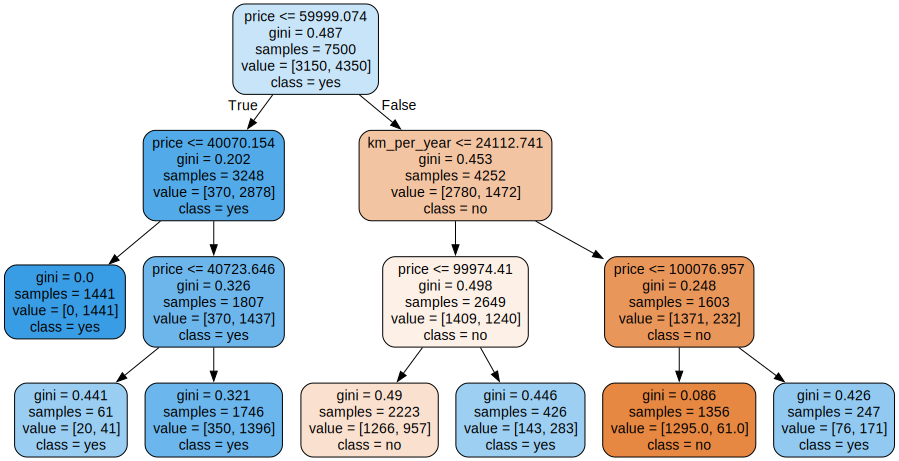

In [47]:
from sklearn.tree import export_graphviz
import graphviz
features = x.columns
dot_data = export_graphviz(model, out_file=None,
                           filled=True, rounded= True,
                            feature_names= features,
                            class_names=['no', 'yes'])
graphic = graphviz.Source(dot_data)
graphic